In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
import torch
import torchvision
import sys
sys.path.insert(0, "../")
import mytorch
from mytorch.tensor import Tensor
from mytorch import nn

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The aim of this notebook is to recreate the pytorch_mnist notebook using mytorch

### Load data

I'll use torchvision to load the data just for convenience, all training will be done using only mytorch and numpy

In [3]:
train_batch_size = 64
test_batch_size = 64

In [4]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./datasets', train=True, download=True,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(0, 1)
                              ])),
    batch_size=train_batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./datasets', train=False, download=True,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(0, 1)
                              ])),
    batch_size=test_batch_size, shuffle=True
)

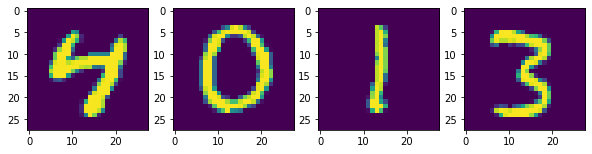

In [5]:
# visualize some images
train_iter = iter(train_loader)
images, labels = train_iter.next()
plt.figure(figsize=(10,8))
for i in range(4):
    ax = plt.subplot(1, 4, i+1)
    ax.imshow(images[i].reshape(28, 28))

### Build simple neural network using mytorch

In [13]:
class Model(nn.Module):
    def __init__(self):
        self.fc1 = nn.Linear(784, 200)
        self.relu = nn.Relu()
        self.fc2 = nn.Linear(200, 10)
        
    def forward(self, inputs):
        a1 = self.relu(self.fc1(inputs))
        return self.fc2(a1)

In [14]:
model = Model()

In [21]:
lr = 0.01
losses = []
accuracies = []
for epoch in range(10):
    total_loss = 0
    total_accuracy = 0
    for i, data in tqdm(enumerate(train_loader)):
        images, labels = data
        images = images.numpy() #(64, 1, 28, 28)
        if images.shape[0] != train_batch_size:
            continue
        labels = Tensor(labels.numpy()) #(64,)
        batch_size = images.shape[0]
        
        # forward pass
        images = Tensor(images.reshape(batch_size, -1))
        outputs = model(images)
        
        # calculate loss
        cross_entropy_loss = nn.CrossEntropyLoss()
        loss = cross_entropy_loss(outputs, labels)
        print(loss)
        losses.append(loss.data)
        total_loss += loss.data
        
        # calculate accuracy
        accuracy = (np.argmax(outputs.data, axis=1) == labels.data).sum() / labels.shape[0]
        accuracies.append(accuracy)
        total_accuracy += accuracy
        
        # backward pass, compute gradients
        loss.backward()
        
        # SGD update weights
#         W1.data = W1.data - lr * W1.grad
#         W2.data = W2.data - lr * W2.grad
#         b1.data = b1.data - lr * b1.grad
#         b2.data = b2.data - lr * b2.grad
#         print(W1.shape, W2.shape, b1.shape, b2.shape)
    print(f'Epoch {epoch+1}, Loss: {total_loss/(i+1)}, Accuracy: {total_accuracy/(i+1)}')

0it [00:00, ?it/s]

Tensor(data=168.5910789950164, grad=None)


AttributeError: 'NoneType' object has no attribute 'dot'

In [18]:
def initialize_weights():
    # weights and bias for each layer
    return [Tensor(np.random.randn(784, 200)), Tensor(np.random.randn(200,)), 
            Tensor(np.random.randn(200, 10)), Tensor(np.random.randn(10,))]

In [19]:
W1, b1, W2, b2 = initialize_weights()
lr = 0.01
losses = []
accuracies = []
for epoch in range(10):
    total_loss = 0
    total_accuracy = 0
    for i, data in tqdm(enumerate(train_loader)):
        images, labels = data
        images = images.numpy() #(64, 1, 28, 28)
        if images.shape[0] != train_batch_size:
            continue
        labels = Tensor(labels.numpy()) #(64,)
        batch_size = images.shape[0]
        
        # forward pass
        images = Tensor(images.reshape(batch_size, -1))
        H1 = images.dot(W1) + b1 # (64, 200)
        relu = nn.Relu()
        A1 = relu(H1) # (64, 200)
        H2 = A1.dot(W2) + b2 # (64, 10)
        
        # calculate loss
        cross_entropy_loss = nn.CrossEntropyLoss()
        loss = cross_entropy_loss(H2, labels)
        print(loss)
        losses.append(loss.data)
        total_loss += loss.data
        
        # calculate accuracy
        accuracy = (np.argmax(H2.data, axis=1) == labels.data).sum() / labels.shape[0]
        accuracies.append(accuracy)
        total_accuracy += accuracy
        
        # backward pass, compute gradients
        loss.backward()
        
        # SGD update weights
        W1.data = W1.data - lr * W1.grad
        W2.data = W2.data - lr * W2.grad
        b1.data = b1.data - lr * b1.grad
        b2.data = b2.data - lr * b2.grad
#         print(W1.shape, W2.shape, b1.shape, b2.shape)
    print(f'Epoch {epoch+1}, Loss: {total_loss/(i+1)}, Accuracy: {total_accuracy/(i+1)}')

10it [00:00, 39.56it/s]

Tensor(data=132.43684471866814, grad=None)
Tensor(data=120.16291337139353, grad=None)
Tensor(data=96.37992769477086, grad=None)
Tensor(data=102.99702925892697, grad=None)
Tensor(data=87.34846400019306, grad=None)
Tensor(data=88.48393181710725, grad=None)
Tensor(data=90.08463852838241, grad=None)
Tensor(data=84.68115498339577, grad=None)
Tensor(data=69.25559225073327, grad=None)
Tensor(data=66.59627662451351, grad=None)


15it [00:00, 40.80it/s]

Tensor(data=77.68760803044658, grad=None)
Tensor(data=77.8201859848325, grad=None)
Tensor(data=65.61542381919894, grad=None)
Tensor(data=66.77647033508094, grad=None)
Tensor(data=63.10252457835662, grad=None)
Tensor(data=70.0820297967429, grad=None)
Tensor(data=60.107732545363504, grad=None)
Tensor(data=59.23539916171639, grad=None)
Tensor(data=76.46023439259314, grad=None)


24it [00:00, 38.16it/s]

Tensor(data=53.82464648040117, grad=None)
Tensor(data=69.98361730019329, grad=None)
Tensor(data=61.471993339668145, grad=None)
Tensor(data=53.8365945394638, grad=None)
Tensor(data=48.875306863662786, grad=None)
Tensor(data=51.69721124790948, grad=None)
Tensor(data=56.47712583646923, grad=None)
Tensor(data=48.738435898506566, grad=None)


32it [00:00, 34.55it/s]

Tensor(data=47.33778304255494, grad=None)
Tensor(data=60.25822895362769, grad=None)
Tensor(data=52.66520264245567, grad=None)
Tensor(data=48.95416223944564, grad=None)
Tensor(data=51.782683819566195, grad=None)
Tensor(data=66.86446757594102, grad=None)
Tensor(data=41.27024938242965, grad=None)


40it [00:01, 34.42it/s]

Tensor(data=46.17881471291929, grad=None)
Tensor(data=52.764174410859475, grad=None)
Tensor(data=54.38221475809941, grad=None)
Tensor(data=40.76975706929021, grad=None)
Tensor(data=52.20680300192781, grad=None)
Tensor(data=45.911877719210324, grad=None)
Tensor(data=41.50299945442265, grad=None)
Tensor(data=39.25332024966316, grad=None)

44it [00:01, 34.71it/s]


Tensor(data=40.26734935160921, grad=None)
Tensor(data=45.5444268657462, grad=None)
Tensor(data=39.95622253782043, grad=None)
Tensor(data=52.00228455976084, grad=None)
Tensor(data=32.3806597401089, grad=None)


52it [00:01, 30.10it/s]

Tensor(data=41.32286016645378, grad=None)
Tensor(data=42.965671492288024, grad=None)
Tensor(data=29.64338411875235, grad=None)
Tensor(data=21.345640552311767, grad=None)
Tensor(data=30.00247008723617, grad=None)
Tensor(data=36.45365004556182, grad=None)
Tensor(data=34.270010659907754, grad=None)


60it [00:01, 30.59it/s]

Tensor(data=41.092844358920836, grad=None)
Tensor(data=41.43288501385019, grad=None)
Tensor(data=28.446638408514236, grad=None)
Tensor(data=37.93352443616707, grad=None)
Tensor(data=37.610259083662584, grad=None)
Tensor(data=41.449418173575886, grad=None)
Tensor(data=31.2494913709159, grad=None)


68it [00:01, 30.90it/s]

Tensor(data=31.64257143123399, grad=None)
Tensor(data=34.36975869834674, grad=None)
Tensor(data=37.00590226850987, grad=None)
Tensor(data=22.69182376557369, grad=None)
Tensor(data=27.894976950733252, grad=None)
Tensor(data=34.89948415112683, grad=None)
Tensor(data=32.43235941424814, grad=None)


72it [00:02, 30.10it/s]

Tensor(data=22.473891516450315, grad=None)
Tensor(data=34.48400274874653, grad=None)
Tensor(data=40.2202604393289, grad=None)
Tensor(data=24.08795711585899, grad=None)
Tensor(data=28.415969626681132, grad=None)
Tensor(data=20.17568108276051, grad=None)


81it [00:02, 30.68it/s]

Tensor(data=29.258121629748306, grad=None)
Tensor(data=34.893969575815554, grad=None)
Tensor(data=32.64964664461803, grad=None)
Tensor(data=26.466109737757826, grad=None)
Tensor(data=37.242839341434944, grad=None)
Tensor(data=21.358563723374218, grad=None)
Tensor(data=27.199786366513845, grad=None)
Tensor(data=28.86575738326938, grad=None)
Tensor(data=27.372614464736987, grad=None)


85it [00:02, 30.56it/s]

Tensor(data=20.557492182440143, grad=None)
Tensor(data=34.06645253269063, grad=None)
Tensor(data=32.146096075238205, grad=None)
Tensor(data=21.725398156186916, grad=None)
Tensor(data=23.327824896701877, grad=None)
Tensor(data=26.18124716331598, grad=None)


93it [00:02, 29.52it/s]

Tensor(data=31.40501077003418, grad=None)
Tensor(data=26.745934464923064, grad=None)
Tensor(data=20.014043766135444, grad=None)
Tensor(data=31.594822385008555, grad=None)
Tensor(data=32.066421558270854, grad=None)
Tensor(data=26.271011269329865, grad=None)
Tensor(data=24.61141495115927, grad=None)
Tensor(data=24.72212743743681, grad=None)


105it [00:03, 33.81it/s]

Tensor(data=27.98447594861567, grad=None)
Tensor(data=28.10880756429517, grad=None)
Tensor(data=19.12342491626943, grad=None)
Tensor(data=25.438234584363855, grad=None)
Tensor(data=24.627407413198327, grad=None)
Tensor(data=17.53672770475743, grad=None)
Tensor(data=22.628945571231736, grad=None)
Tensor(data=24.096629909757752, grad=None)
Tensor(data=15.343563671349155, grad=None)


106it [00:03, 32.65it/s]


KeyboardInterrupt: 

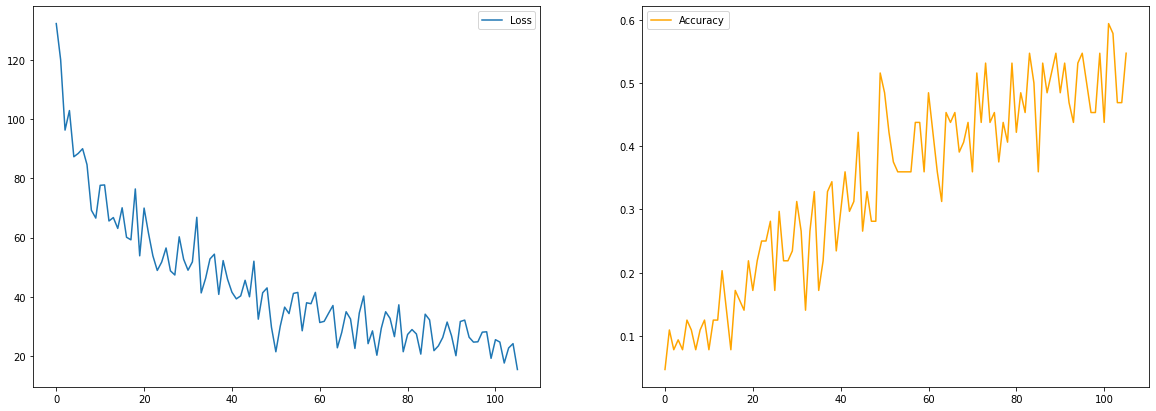

In [20]:
plt.figure(figsize=(20,7))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(losses)
ax1.legend(['Loss'])
ax2 = plt.subplot(1, 2, 2)
ax2.plot(accuracies, color='orange')
ax2.legend(['Accuracy'])
plt.show()

In [57]:
correct = 0
total = 0
for data in test_loader:
    images, labels = data
    images = images.numpy().reshape(images.shape[0], -1)
    if images.shape[0] != 64:
        continue
    images = Tensor(images)
    labels = Tensor(labels.numpy())
    
    # forward pass
    H1 = images.dot(W1) + b1 # (64, 200)
    A1 = relu(H1) # (64, 200)
    H2 = A1.dot(W2) + b2 # (64, 10)
    
    correct += (np.argmax(H2.data, axis=1) == labels.data).sum()
    total += labels.shape[0]
print(f'Accuracy on test set: {correct / total}')

Accuracy on test set: 0.9042467948717948
